In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

In [54]:
def GD_WT(f, grad_f, x0, kmax, tolf, tolx, alpha):
    xsol=x0
    x=[x0]
    f_val=[f(xsol)]
    grad=[grad_f(xsol)]
    err=[np.linalg.norm(grad_f(xsol))]
    i=0
    cond = True
    while i < kmax and cond :
        xsol=(xsol-alpha*grad_f(xsol))
        x.append(xsol)
        f_val.append(f(xsol))
        grad.append(grad_f(xsol))
        err.append(np.linalg.norm(grad_f(xsol)))
        i+=1
        cond =  np.linalg.norm(grad_f(xsol)) > tolf*np.linalg.norm(grad_f(x0)) and np.linalg.norm(x[i]-x[i-1]) > tolx
    return x,i,f_val,grad,err

In [55]:
def GD(f, grad_f, x0, kmax, tolf, tolx):
    xsol=x0
    x=[x0]
    f_val=[f(xsol)]
    grad=[grad_f(xsol)]
    err=[np.linalg.norm(grad_f(xsol))]
    i=0
    cond = True
    while i < kmax and cond :
        alpha = backtracking(f, grad_f, xsol)
        xsol=(xsol-alpha*grad_f(xsol))
        x.append(xsol)
        f_val.append(f(xsol))
        grad.append(grad_f(xsol))
        err.append(np.linalg.norm(grad_f(xsol)))
        i+=1
        cond =  np.linalg.norm(grad_f(xsol)) > tolf*np.linalg.norm(grad_f(x0)) and np.linalg.norm(x[i]-x[i-1]) > tolx
    return x,i,f_val,grad,err

In [56]:
def f(x):
    return x**4+x**3-2*x**2-2*x
    
def grad_f(x):
    return 4*x**3+3*x**2-4*x-2

### GD with backtracking method (x0 = 0)

In [57]:
x0=np.array([0])
x_comp, i_comp,f_val_comp, grad_comp, err_comp = GD(f,grad_f,x0,10000, 1e-5, 1e-5)
print("x=",x_comp[-1])
print("K=",i_comp)
print("f(x)=",f_val_comp[-1])
print("grad_f(x)=",grad_comp[-1])
print("Error=",err_comp[-1])

x= [0.92218332]
K= 47
f(x)= [-2.03774803]
grad_f(x)= [-0.00048688]
Error= 0.0004868777899496024


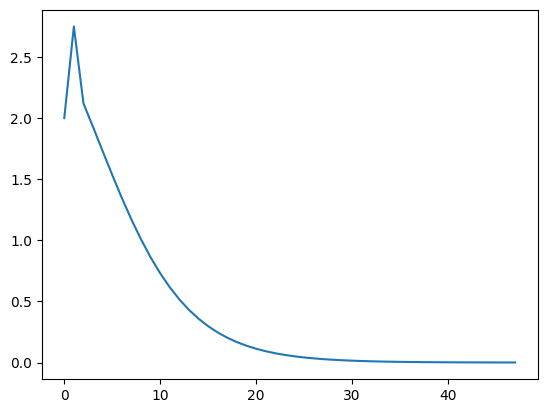

In [58]:
plt.plot(np.arange(0,i_comp+1), err_comp)
plt.show()

### GD with backtracking method (x0 = -1.8)

In [59]:
x0=np.array([-1.8])
x_comp, i_comp,f_val_comp, grad_comp, err_comp = GD(f,grad_f,x0,10000, 1e-5, 1e-5)
print("x=",x_comp[-1])
print("K=",i_comp)
print("f(x)=",f_val_comp[-1])
print("grad_f(x)=",grad_comp[-1])
print("Error=",err_comp[-1])

x= [-1.23231449]
K= 72
f(x)= [-0.13781765]
grad_f(x)= [-0.00051122]
Error= 0.0005112203412629412


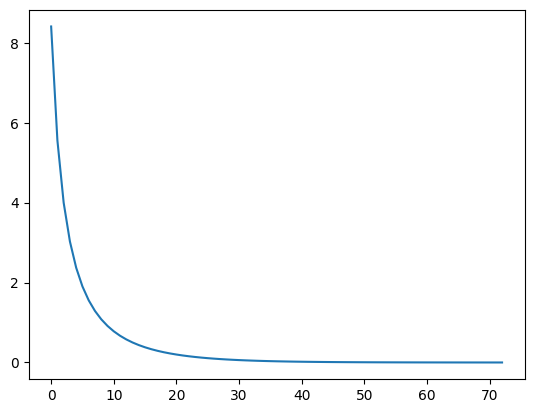

In [60]:
plt.plot(np.arange(0,i_comp+1), err_comp)
plt.show()

### GD without backtracking method with alpha = 0.0001

In [61]:
x_comp, i_comp,f_val_comp, grad_comp, err_comp = GD_WT(f,grad_f, x0, 1000, 1e-5, 1e-5, 1e-4)
print("x=",x_comp[-1])
print("K=",i_comp)
print("f(x)=",f_val_comp[-1])
print("grad_f(x)=",grad_comp[-1])
print("Error=",err_comp[-1])

x= [-1.41809674]
K= 1000
f(x)= [0.00652096]
grad_f(x)= [-1.7017789]
Error= 1.701778895899131


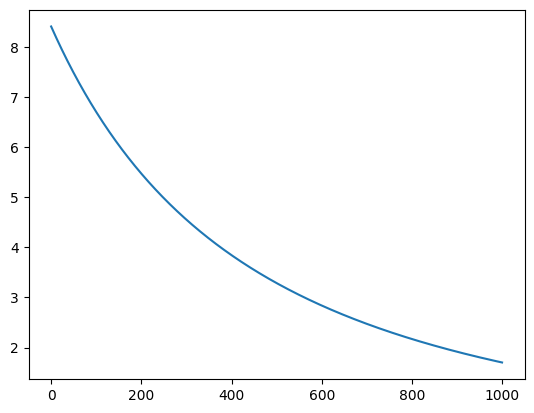

In [62]:
plt.plot(np.arange(0,i_comp+1), err_comp)
plt.show()

### GD without backtracking method with alpha = 0.001

In [63]:
x_comp, i_comp,f_val_comp, grad_comp, err_comp = GD_WT(f,grad_f, x0, 1000, 1e-5, 1e-5, 1e-3)
print("x=",x_comp[-1])
print("K=",i_comp)
print("f(x)=",f_val_comp[-1])
print("grad_f(x)=",grad_comp[-1])
print("Error=",err_comp[-1])

x= [-1.23368125]
K= 767
f(x)= [-0.13781056]
grad_f(x)= [-0.00986732]
Error= 0.0098673228371986


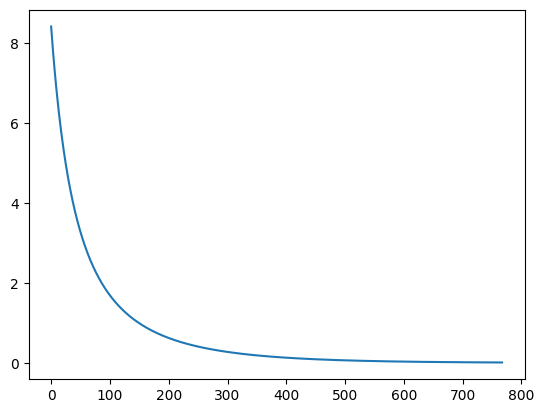

In [64]:
plt.plot(np.arange(0,i_comp+1), err_comp)
plt.show()

In [65]:
x0=np.array([-2])
x_comp, i_comp,f_val_comp, grad_comp, err_comp = GD_WT(f,grad_f,x0,10000, 1e-6, 1e-6, 0.100)
print("x=",x_comp[-1])
print("K=",i_comp)
print("f(x)=",f_val_comp[-1])
print("grad_f(x)=",grad_comp[-1])
print("Error=",err_comp[-1])

x= [-1.23223815]
K= 17
f(x)= [-0.13781767]
grad_f(x)= [1.00606652e-05]
Error= 1.0060665179167927e-05


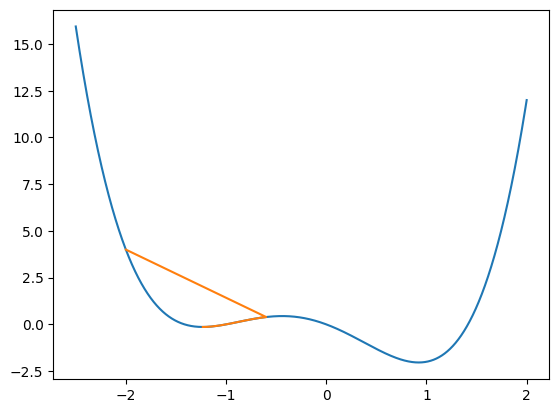

In [66]:
x = np.linspace(-2.5,2,1000000)
plt.plot(x, f(x))
plt.plot(x_comp, f(np.array(x_comp)))
plt.show()

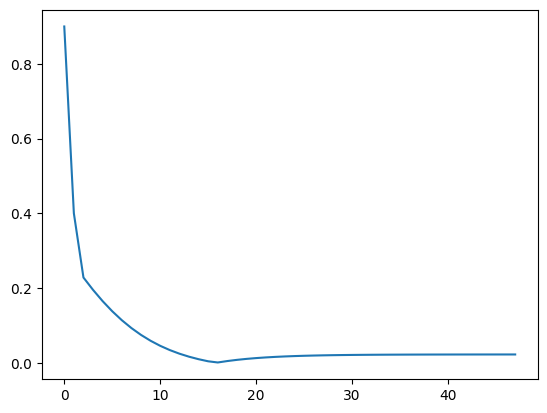

In [67]:
x0=np.array([0])
x_comp, i_comp,f_val_comp, grad_comp, err_comp = GD(f,grad_f, x0, 100, 1e-5, 1e-5)
x_true = np.array([0.9])
plt.plot(np.arange(0,i_comp+1), [np.linalg.norm(s-x_true,2) for s in x_comp])
plt.show()